## Modelo KNN HUELVA

## PROBLEMA 
Por el aumento del tráfico de transporte de Mercancías por vía marítima. Se realiza la Predicción para los siguientes meses del flujo de Mercancías total para las principales Autoridades Porturarias españolas.




## LIBRERÍAS


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## DATOS

In [2]:
trafico = pd.read_csv('trafic.csv')
display(trafico.head())
display(trafico.shape)

,Unnamed: 0,Autoridad_Portuaria,Graneles Líquidos t,Graneles Sólidos t,Mercancía General t,Mercancia General Contenedores t,Mercancías En Tránsito t,Tráfico Ro-Ro t,TEUS Contenedores,Total_pasajeros,Anios,Mes,fecha,Total_buques,Total_automoviles,Total_toneladas
0,0,1,623294,464559,79616,0,92330,0,0.0,4722,2022,1,2022-01-01,94,0,1259799
1,1,2,0,119575,104040,97163,4663,59,14934.0,11874,2022,1,2022-01-01,44,2257,325500
2,2,3,7512,266992,134447,35899,141,71601,2129.5,13819,2022,1,2022-01-01,3115,3566,516592
3,3,4,74703,189219,97892,0,3025,0,0.0,0,2022,1,2022-01-01,65,0,364839
4,4,5,2268541,207212,6062831,4742267,5304368,1304479,396644.0,112032,2022,1,2022-01-01,42993,17298,19889698


(784, 16)

In [3]:
# Eliminación de variables innecesarias 
trafico = trafico.drop('Unnamed: 0', axis=1)

In [4]:
trafico.dtypes

Autoridad_Portuaria                   int64
Graneles Líquidos t                   int64
Graneles Sólidos t                    int64
Mercancía General t                   int64
Mercancia General Contenedores t      int64
Mercancías En Tránsito t              int64
Tráfico Ro-Ro t                       int64
TEUS Contenedores                   float64
Total_pasajeros                       int64
Anios                                 int64
Mes                                   int64
fecha                                object
Total_buques                          int64
Total_automoviles                     int64
Total_toneladas                       int64
dtype: object

In [5]:
trafico['fecha'] = pd.to_datetime(trafico['fecha'])
trafico.head()

,Autoridad_Portuaria,Graneles Líquidos t,Graneles Sólidos t,Mercancía General t,Mercancia General Contenedores t,Mercancías En Tránsito t,Tráfico Ro-Ro t,TEUS Contenedores,Total_pasajeros,Anios,Mes,fecha,Total_buques,Total_automoviles,Total_toneladas
0,1,623294,464559,79616,0,92330,0,0.0,4722,2022,1,2022-01-01,94,0,1259799
1,2,0,119575,104040,97163,4663,59,14934.0,11874,2022,1,2022-01-01,44,2257,325500
2,3,7512,266992,134447,35899,141,71601,2129.5,13819,2022,1,2022-01-01,3115,3566,516592
3,4,74703,189219,97892,0,3025,0,0.0,0,2022,1,2022-01-01,65,0,364839
4,5,2268541,207212,6062831,4742267,5304368,1304479,396644.0,112032,2022,1,2022-01-01,42993,17298,19889698


In [6]:
trafico.dtypes

Autoridad_Portuaria                          int64
Graneles Líquidos t                          int64
Graneles Sólidos t                           int64
Mercancía General t                          int64
Mercancia General Contenedores t             int64
Mercancías En Tránsito t                     int64
Tráfico Ro-Ro t                              int64
TEUS Contenedores                          float64
Total_pasajeros                              int64
Anios                                        int64
Mes                                          int64
fecha                               datetime64[ns]
Total_buques                                 int64
Total_automoviles                            int64
Total_toneladas                              int64
dtype: object

## Huelva

In [7]:
df_huelva = trafico[trafico['Autoridad_Portuaria'] == 15]
df_huelva.head()

,Autoridad_Portuaria,Graneles Líquidos t,Graneles Sólidos t,Mercancía General t,Mercancia General Contenedores t,Mercancías En Tránsito t,Tráfico Ro-Ro t,TEUS Contenedores,Total_pasajeros,Anios,Mes,fecha,Total_buques,Total_automoviles,Total_toneladas
14,15,1809356,522886,94307,39604,99578,40021,5585.75,3888,2022,1,2022-01-01,2260,2883,2605752
42,15,1843815,520843,96210,48191,84559,46877,6899.25,3678,2022,2,2022-02-01,2542,2786,2640495
70,15,2292832,240107,105522,40542,329491,52260,6023.50,4687,2022,3,2022-03-01,2772,3226,3060754
98,15,2225244,368346,128152,56078,186956,54890,7811.75,5917,2022,4,2022-04-01,3090,4208,3019666
126,15,2183438,498990,131691,55015,297687,52047,7311.50,5575,2022,5,2022-05-01,2819,4186,3218868


In [8]:
df_huelva = df_huelva.drop('Autoridad_Portuaria', axis=1)

In [9]:
datos_huelva = df_huelva[['Total_toneladas']]

In [10]:
datos_huelva.to_excel('autoridades/huelva.xlsx')

In [10]:
df_huelva.dtypes

Graneles Líquidos t                          int64
Graneles Sólidos t                           int64
Mercancía General t                          int64
Mercancia General Contenedores t             int64
Mercancías En Tránsito t                     int64
Tráfico Ro-Ro t                              int64
TEUS Contenedores                          float64
Total_pasajeros                              int64
Anios                                        int64
Mes                                          int64
fecha                               datetime64[ns]
Total_buques                                 int64
Total_automoviles                            int64
Total_toneladas                              int64
dtype: object

In [11]:
df_huelva.describe()

,Graneles Líquidos t,Graneles Sólidos t,Mercancía General t,Mercancia General Contenedores t,Mercancías En Tránsito t,Tráfico Ro-Ro t,TEUS Contenedores,Total_pasajeros,Anios,Mes,fecha,Total_buques,Total_automoviles,Total_toneladas
count,2.800000e+01,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28,28.000000,28.000000,2.800000e+01
mean,1.992507e+06,469922.928571,121713.321429,53627.071429,196413.535714,53022.035714,7339.982143,5728.892857,2022.714286,5.928571,2023-02-14 22:17:08.571428608,2874.107143,4835.714286,2.887206e+06
min,1.243543e+06,240107.000000,90431.000000,39604.000000,84559.000000,39141.000000,5585.750000,3678.000000,2022.000000,1.000000,2022-01-01 00:00:00,2260.000000,2786.000000,1.949324e+06
25%,1.806838e+06,367527.500000,103552.750000,45787.250000,138217.000000,50421.750000,6543.125000,4569.250000,2022.000000,3.000000,2022-07-24 06:00:00,2672.500000,3762.250000,2.673350e+06
50%,1.992227e+06,497361.500000,115680.500000,51349.500000,197222.500000,52813.000000,7181.000000,5252.000000,2023.000000,5.500000,2023-02-15 00:00:00,2894.500000,4456.000000,2.999016e+06
75%,2.213846e+06,554753.250000,135875.000000,56448.000000,227309.500000,57281.500000,7911.375000,6411.000000,2023.000000,9.000000,2023-09-08 12:00:00,3073.000000,5182.750000,3.097396e+06
max,2.318535e+06,749896.000000,187957.000000,80948.000000,329491.000000,63810.000000,10381.500000,9498.000000,2024.000000,12.000000,2024-04-01 00:00:00,3553.000000,10704.000000,3.279106e+06
std,2.589052e+05,117677.804638,24704.207241,10520.846966,63116.135398,6579.993890,1177.587971,1671.354570,0.712697,3.579040,NaN,312.742864,1889.560205,3.041413e+05


In [12]:
df_huelva.tail()

,Graneles Líquidos t,Graneles Sólidos t,Mercancía General t,Mercancia General Contenedores t,Mercancías En Tránsito t,Tráfico Ro-Ro t,TEUS Contenedores,Total_pasajeros,Anios,Mes,fecha,Total_buques,Total_automoviles,Total_toneladas
658,2019325,562932,153641,67025,189369,63250,9327.25,4601,2023,12,2023-12-01,3553,4082,3055542
686,2309681,554276,123567,56391,152787,58405,7990.50,4194,2024,1,2024-01-01,2673,3357,3255107
714,1819801,287063,135567,67695,220557,56371,9211.00,4070,2024,2,2024-02-01,2896,3874,2587054
742,1965129,399016,187957,80948,322956,63810,10381.50,5089,2024,3,2024-03-01,3493,4646,3019816
770,2241857,504866,173675,69734,227082,61892,8709.50,4580,2024,4,2024-04-01,2898,6448,3279106


In [13]:
df_huelva =df_huelva.set_index('fecha')

In [14]:
df_huelva.head()

,Graneles Líquidos t,Graneles Sólidos t,Mercancía General t,Mercancia General Contenedores t,Mercancías En Tránsito t,Tráfico Ro-Ro t,TEUS Contenedores,Total_pasajeros,Anios,Mes,Total_buques,Total_automoviles,Total_toneladas
fecha,,,,,,,,,,,,,
2022-01-01,1809356,522886,94307,39604,99578,40021,5585.75,3888,2022,1,2260,2883,2605752
2022-02-01,1843815,520843,96210,48191,84559,46877,6899.25,3678,2022,2,2542,2786,2640495
2022-03-01,2292832,240107,105522,40542,329491,52260,6023.50,4687,2022,3,2772,3226,3060754
2022-04-01,2225244,368346,128152,56078,186956,54890,7811.75,5917,2022,4,3090,4208,3019666
2022-05-01,2183438,498990,131691,55015,297687,52047,7311.50,5575,2022,5,2819,4186,3218868


## Selección de Variables Cartagena

Utilización de la Correlación entre cada una de las características y la variable a predecir.

In [15]:
corr_matriz_huelva =df_huelva.corr(method='pearson')
corr_matriz_huelva

,Graneles Líquidos t,Graneles Sólidos t,Mercancía General t,Mercancia General Contenedores t,Mercancías En Tránsito t,Tráfico Ro-Ro t,TEUS Contenedores,Total_pasajeros,Anios,Mes,Total_buques,Total_automoviles,Total_toneladas
Graneles Líquidos t,1.000000,-0.054832,-0.086996,-0.167200,0.346585,0.114533,-0.113154,0.016648,-0.119374,-0.043021,-0.118762,0.070889,0.891602
Graneles Sólidos t,-0.054832,1.000000,0.011900,0.120179,-0.197930,-0.059821,0.075181,0.088898,-0.091419,0.383436,0.033935,0.192651,0.302996
Mercancía General t,-0.086996,0.011900,1.000000,0.868273,0.523533,0.645453,0.841331,0.005335,0.629569,0.152896,0.706193,0.336233,0.164418
Mercancia General Contenedores t,-0.167200,0.120179,0.868273,1.000000,0.401385,0.576596,0.970132,0.056712,0.612839,0.192508,0.641561,0.170756,0.105057
Mercancías En Tránsito t,0.346585,-0.197930,0.523533,0.401385,1.000000,0.338260,0.369161,0.177218,0.177129,0.154622,0.368334,0.309015,0.489703
Tráfico Ro-Ro t,0.114533,-0.059821,0.645453,0.576596,0.338260,1.000000,0.559994,-0.178804,0.579811,0.095898,0.809951,0.217016,0.238556
TEUS Contenedores,-0.113154,0.075181,0.841331,0.970132,0.369161,0.559994,1.000000,0.082859,0.603202,0.174998,0.644869,0.151133,0.123386
Total_pasajeros,0.016648,0.088898,0.005335,0.056712,0.177218,-0.178804,0.082859,1.000000,-0.244293,0.450875,0.014631,0.458981,0.083871
Anios,-0.119374,-0.091419,0.629569,0.612839,0.177129,0.579811,0.603202,-0.244293,1.000000,-0.298696,0.439653,0.013606,-0.015352
Mes,-0.043021,0.383436,0.152896,0.192508,0.154622,0.095898,0.174998,0.450875,-0.298696,1.000000,0.365772,0.497292,0.164977


# Matriz de Correlaciones


Text(0.5, 1.0, 'Matriz de Correlación Huelva')

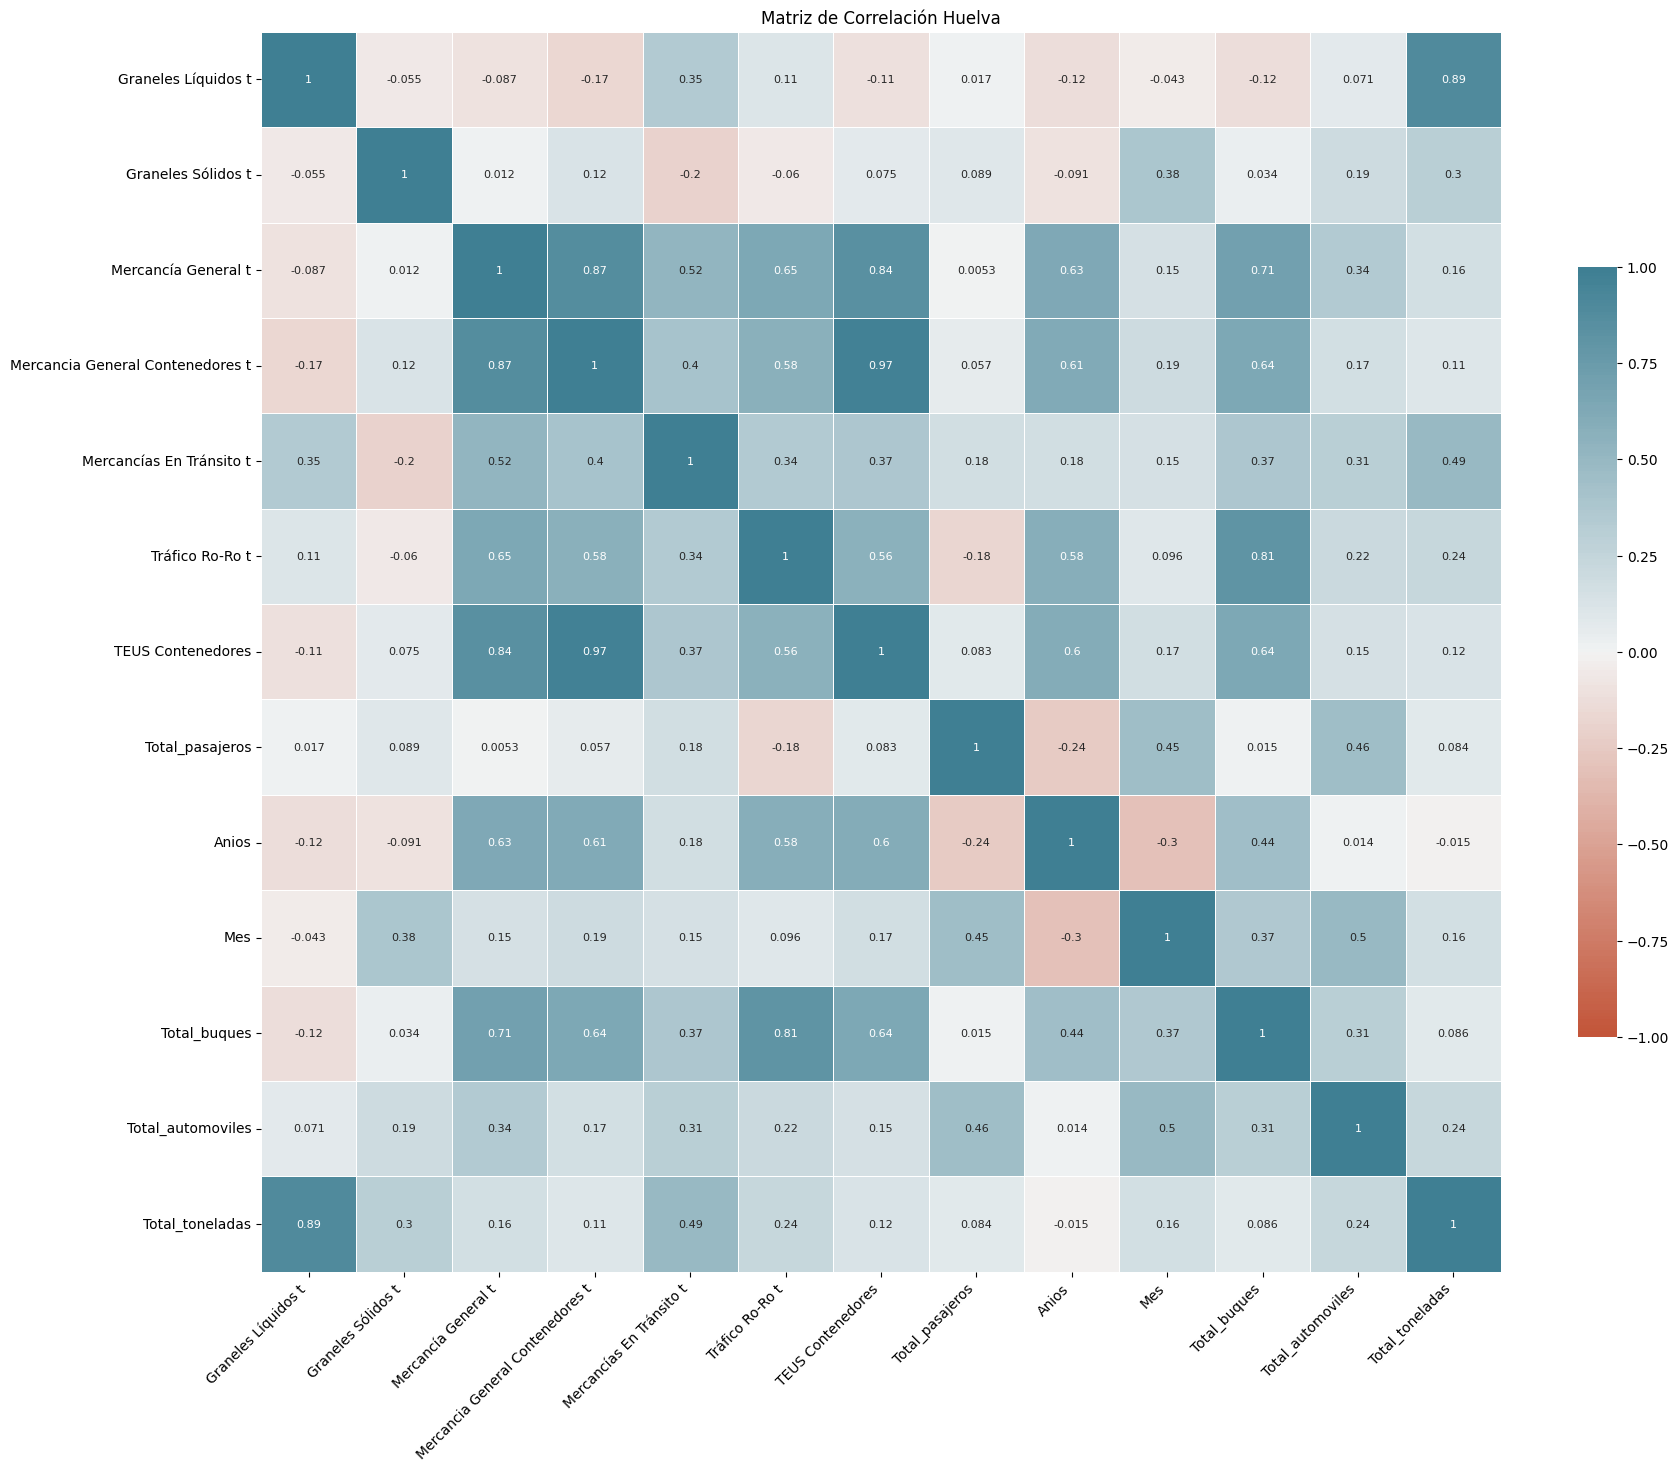

In [16]:
# Heatmap Matriz de Correlaciones 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

sns.heatmap(
    data = corr_matriz_huelva,
    annot= True,
    cbar= True,
    annot_kws={"size":8},
    vmin= -1,
    vmax=1,
    center=0,
    cmap = sns.diverging_palette(20, 220, n=200),
    square= True,
    ax= ax,
    linewidths=.5,
    cbar_kws={"shrink":.5}
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize=10)
plt.title('Matriz de Correlación Huelva')

Elección de variables con una correlación mayor del 70%

- Graneles Líquidos t




- Total_toneladas

In [17]:
# Selección
from sklearn.model_selection import train_test_split

df = df_huelva[['Graneles Líquidos t', 'Total_toneladas']]

train, test = train_test_split(df, test_size=0.30, shuffle=False)

In [18]:
# Reseteamos el index con el fin de evitar problemas en la validación cruzada

train.reset_index(drop=True, inplace= True)
train.head()

,Graneles Líquidos t,Total_toneladas
0,1809356,2605752
1,1843815,2640495
2,2292832,3060754
3,2225244,3019666
4,2183438,3218868


# 1. Parametrización

Elección: KNeighbors, k y Pesos se van a parametrizar para ello se ejecutará [validación cruzada] t como medida de éxito [MAE]

Min Value uniform : 147936.0625 (4)
Min Value distance : 146872.1083430101 (5)


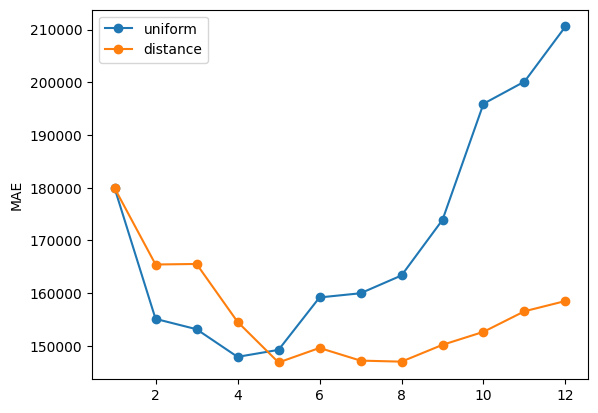

In [19]:
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import numpy as np

cv = KFold(n_splits =5, shuffle = False) #
# se podría utilizar https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html 


for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,13):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)

       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(train):
          # División train test aleatoria
          f_train = train.loc[train_fold]
          f_test = train.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train.drop(['Total_toneladas'], axis=1), 
                               y = f_train['Total_toneladas'])
          y_pred = knn.predict(X = f_test.drop(['Total_toneladas'], axis = 1))
          # evaluación del modelo
          mae = mean_absolute_error(f_test['Total_toneladas'], y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    

plt.legend()
plt.show() 

# 2. Construcción y ejecución del modelo



In [21]:
# Constructor 
n_neighbors = 4
weights = 'uniform'
knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)

# fit and predict
knn.fit(X= train.drop(['Total_toneladas'], axis=1), y= train['Total_toneladas'])
y_pred = knn.predict(X=test.drop(['Total_toneladas'], axis=1))
mae = mean_absolute_error(test['Total_toneladas'], y_pred)

print('MAE:', mae)

MAE: 165355.86111111112


In [20]:
# Constructor  Mejor
n_neighbors = 5
weights = 'uniform'
knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)

# fit and predict
knn.fit(X= train.drop(['Total_toneladas'], axis=1), y= train['Total_toneladas'])
y_pred = knn.predict(X=test.drop(['Total_toneladas'], axis=1))
mae = mean_absolute_error(test['Total_toneladas'], y_pred)

print('MAE:', mae)

MAE: 152677.42222222214


In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [22]:
mse_knn = mean_squared_error(test['Total_toneladas'], y_pred)
rmse_knn = np.sqrt(mse_knn)
r2_knn= r2_score(test['Total_toneladas'], y_pred)

In [23]:
print(f"KNN - MAE: {mae}, MSE: {mse_knn}, RMSE: {rmse_knn}, R2: {r2_knn}")

KNN - MAE: 152677.42222222214, MSE: 33604618467.173306, RMSE: 183315.6252673877, R2: 0.4320824781295243


In [23]:
# Redondear el resultado
res = np.rint(y_pred)
res = res.astype(int)
output = pd.DataFrame({'date':test.index, 'result':res})



In [24]:
res = res.tolist()

In [25]:
res

[2597321,
 2597321,
 2597321,
 2597321,
 2967056,
 3111153,
 2597321,
 2716959,
 3080566]

In [26]:
test['Total_toneladas'].tolist()

[2751392,
 2925978,
 2675747,
 2666158,
 3055542,
 3255107,
 2587054,
 3019816,
 3279106]

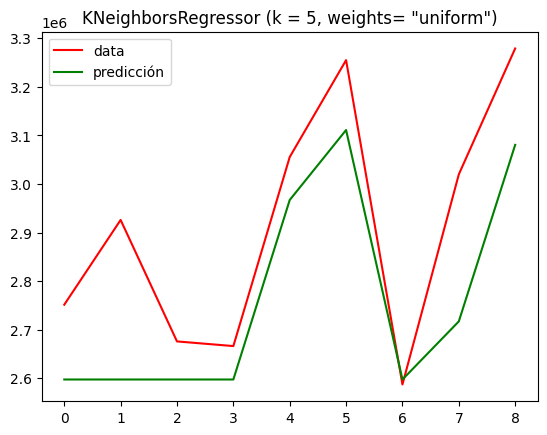

In [27]:
from sklearn.metrics import mean_absolute_error

xx = np.arange(test['Total_toneladas'].shape[0])
plt.plot(xx, test['Total_toneladas'], c='r', label = 'data')
plt.plot(xx, y_pred, c='g', label= 'predicción')
plt.axis('tight')
plt.legend()
plt.title('KNeighborsRegressor (k = %i, weights= "%s")' % (n_neighbors, weights))

plt.show()
          

C:\Users\Encarni\AppData\Local\Temp\ipykernel_15200\2459791614.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  next_month_prediction = knn.predict(X=last_6_months.drop(['Total_toneladas'], axis=1).fillna(method='ffill'))
C:\Users\Encarni\AppData\Local\Temp\ipykernel_15200\2459791614.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_predictions = pd.concat([future_predictions, pd.DataFrame({'Total_toneladas': [next_month_prediction[0]]})], ignore_index=True)
C:\Users\Encarni\AppData\Local\Temp\ipykernel_15200\2459791614.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill()

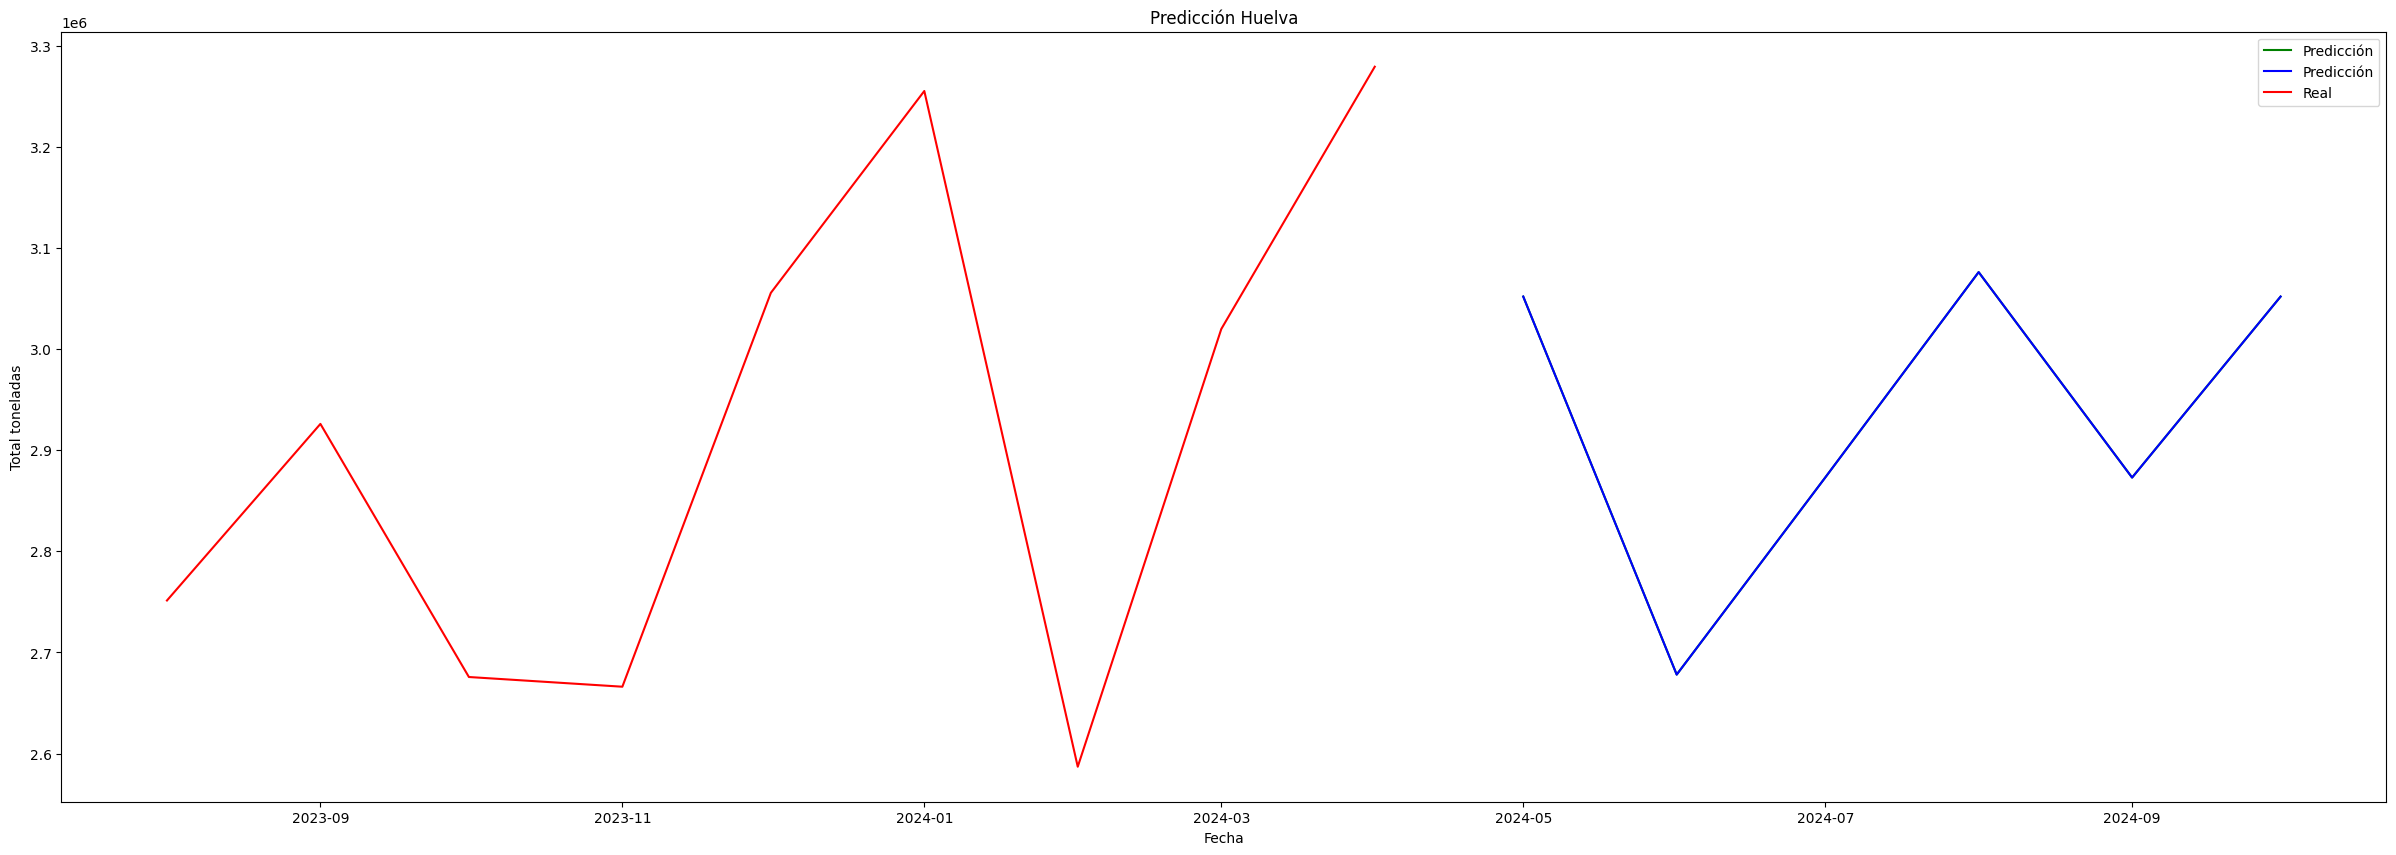

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
# Predecir los siguientes 6 meses


# Obtiene los últimos 6 meses de datos de entrenamiento
train_last_6_months = train.tail(10)

# Ajusta el modelo KNN utilizando los últimos 6 meses de datos de entrenamiento
knn.fit(X=train_last_6_months.drop(['Total_toneladas'], axis=1), y=train_last_6_months['Total_toneladas'])

# Crea un DataFrame vacío para almacenar las predicciones
future_predictions = pd.DataFrame(columns=['Total_toneladas'])

# Bucle para predecir los siguientes 6 meses
for i in range(6):
  # Obtiene las últimas 6 filas de datos (incluidas las predicciones)
  last_6_months = pd.concat([train_last_6_months, future_predictions])[-6:]

  # Realiza la predicción para el siguiente mes
  next_month_prediction = knn.predict(X=last_6_months.drop(['Total_toneladas'], axis=1).fillna(method='ffill'))

  # Agrega la predicción al DataFrame, convirtiendo la predicción a un DataFrame antes de concatenar
  future_predictions = pd.concat([future_predictions, pd.DataFrame({'Total_toneladas': [next_month_prediction[0]]})], ignore_index=True)

# Crea un rango de fechas para los siguientes 6 meses
future_dates = pd.date_range(start=test.index[-1] + pd.DateOffset(months=1), periods=6, freq='MS')

# Crea un DataFrame con las fechas y las predicciones
future_df = pd.DataFrame({'date': future_dates, 'result': future_predictions['Total_toneladas']})

# Concatena los datos de prueba y las predicciones futuras
combined_df = pd.concat([test, future_df])

# Gráfica de las predicciones
fig, ax = plt.subplots(figsize=(30, 10))
# Assuming 'future_data' contains data for the next 6 months
future_dates = pd.to_datetime(['2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01'])

# Assuming 'future_predictions' contains the predictions for those months
plt.plot(future_dates, future_predictions, c='g', label='Predicción')
plt.plot(combined_df['date'], combined_df['result'], c='b', label='Predicción')

plt.plot(test.index, test['Total_toneladas'], c='r', label='Real')
plt.xlabel('Fecha')
plt.ylabel('Total toneladas')
plt.title('Predicción Huelva')
plt.legend()
plt.show()

In [29]:
combined_df

,Graneles Líquidos t,Total_toneladas,date,result
2023-08-01 00:00:00,1744416.0,2751392.0,NaT,NaN
2023-09-01 00:00:00,1819640.0,2925978.0,NaT,NaN
2023-10-01 00:00:00,1773404.0,2675747.0,NaT,NaN
2023-11-01 00:00:00,1659660.0,2666158.0,NaT,NaN
2023-12-01 00:00:00,2019325.0,3055542.0,NaT,NaN
2024-01-01 00:00:00,2309681.0,3255107.0,NaT,NaN
2024-02-01 00:00:00,1819801.0,2587054.0,NaT,NaN
2024-03-01 00:00:00,1965129.0,3019816.0,NaT,NaN
2024-04-01 00:00:00,2241857.0,3279106.0,NaT,NaN
0,NaN,NaN,2024-05-01,3051870.6
